In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns

In [2]:
# Create a reference the CSV file desired
adverse_path = "../Resources/VAERSDATA1 (3).csv"

# Read the CSV into a Pandas DataFrame
adverse = pd.read_csv(adverse_path, low_memory=False)

# Print the first five rows of data to the screen
adverse.head()

,VAERS_ID,RECVDATE,STATE,AGE_YRS,SEX,DIED,DATEDIED,RECOVD,VAX_DATE,ONSET_DATE,NUMDAYS,V_ADMINBY,VAX_MANU,HISTORY,ALLERGIES
0,1021156,2/10/2021,IL,32,F,NaN,NaN,N,1/27/2021,2/4/2021,8.0,SEN,MODERNA,NaN,Nka
1,1029567,2/14/2021,NH,61,M,NaN,NaN,U,2/14/2021,2/14/2021,0.0,PUB,MODERNA,NaN,NaN
2,1061353,2/28/2021,WA,74,M,NaN,NaN,N,2/24/2021,2/24/2021,0.0,PUB,PFIZER\BIONTECH,NaN,sulfa based products
3,1066793,3/2/2021,AZ,81,M,NaN,NaN,N,2/12/2021,2/26/2021,14.0,PUB,PFIZER\BIONTECH,NaN,NaN
4,1219181,4/16/2021,TX,15,M,NaN,NaN,Y,4/15/2021,4/15/2021,0.0,PVT,PFIZER\BIONTECH,NaN,NaN


In [3]:
# Extract records for male and female
died_records = adverse[adverse["DIED"] == "Y"]


In [4]:
# creating bins
bins = list(range(0, 111, 10))
labels=[f"{i}-{i+9}" for i in range(0,110,10)]
died_records.loc[:,"Age_Group"]=pd.cut(died_records["AGE_YRS"],bins=bins,labels=labels,right=False)
died_records.head()

C:\Users\rmwc_\AppData\Local\Temp\ipykernel_34996\3855263692.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  died_records.loc[:,"Age_Group"]=pd.cut(died_records["AGE_YRS"],bins=bins,labels=labels,right=False)


,VAERS_ID,RECVDATE,STATE,AGE_YRS,SEX,DIED,DATEDIED,RECOVD,VAX_DATE,ONSET_DATE,NUMDAYS,V_ADMINBY,VAX_MANU,HISTORY,ALLERGIES,Age_Group
32,1261766,4/27/2021,FL,1,M,Y,4/10/2021,N,4/8/2021,4/10/2021,2.0,UNK,MODERNA,NaN,NaN,0-9
152,2639957,6/1/2023,WI,1,M,Y,4/29/2023,N,4/7/2023,4/29/2023,22.0,PVT,MODERNA,NaN,NaN,0-9
1097,2506670,11/12/2022,MA,1,M,Y,10/7/2022,N,8/10/2022,10/7/2022,58.0,PVT,MODERNA,N/a,N/a,0-9
1664,2536846,12/19/2022,NH,2,F,Y,12/16/2022,N,12/15/2022,12/16/2022,1.0,PVT,MODERNA,Unknown,Unknown,0-9
4908,1890705,11/22/2021,IA,5,F,Y,11/22/2021,N,11/18/2021,11/22/2021,4.0,PVT,PFIZER\BIONTECH,"PMH of twin to twin transfusion born at erm, n...",none known,0-9


Age_Group
0-9          14
10-19        82
20-29       170
30-39       301
40-49       552
50-59      1324
60-69      3142
70-79      4803
80-89      4470
90-99      1935
100-109     113
Name: count, dtype: int64


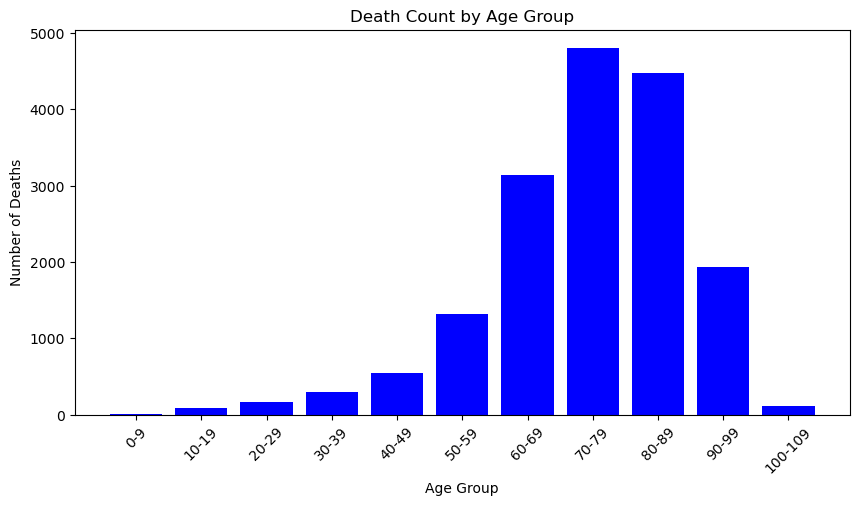

In [ ]:
# Optional: Display count of deaths per age group
age_group_counts = died_records["Age_Group"].value_counts().sort_index()
print(age_group_counts)

# Optional: Plot the age distribution of deaths
plt.figure(figsize=(10, 5))
plt.bar(age_group_counts.index, age_group_counts.values, color='blue')
plt.xlabel("Age Group")
plt.ylabel("Number of Deaths")
plt.title("Death Count by Age Group")
plt.xticks(rotation=45)
plt.show()

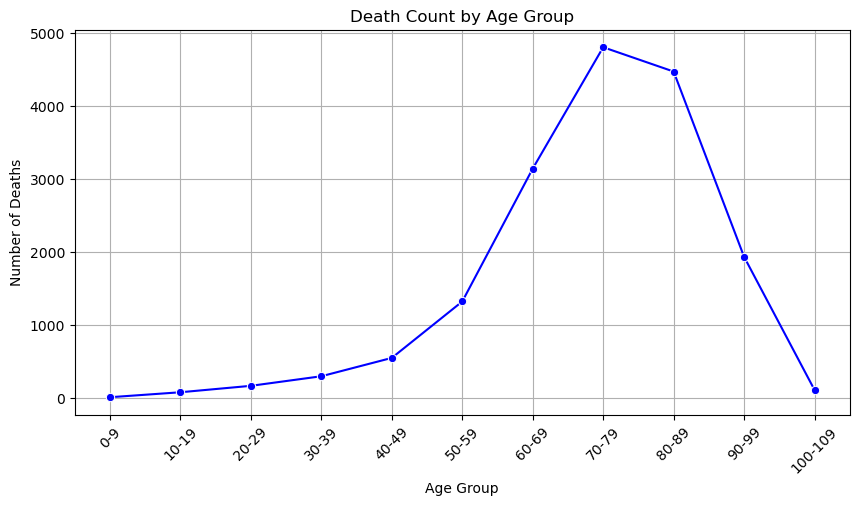

In [6]:
# Plot the age distribution of deaths as a line graph
plt.figure(figsize=(10, 5))
sns.lineplot(x=age_group_counts.index, y=age_group_counts.values, marker="o", linestyle="-", color="b")

# Formatting the graph
plt.xlabel("Age Group")
plt.ylabel("Number of Deaths")
plt.title("Death Count by Age Group")
plt.xticks(rotation=45)
plt.grid(True)

# Show the plot
plt.show()